In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits


In [2]:
digits = load_digits()

In [5]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [14]:
df["target"] = digits.target

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

In [16]:
import matplotlib.pyplot as plt

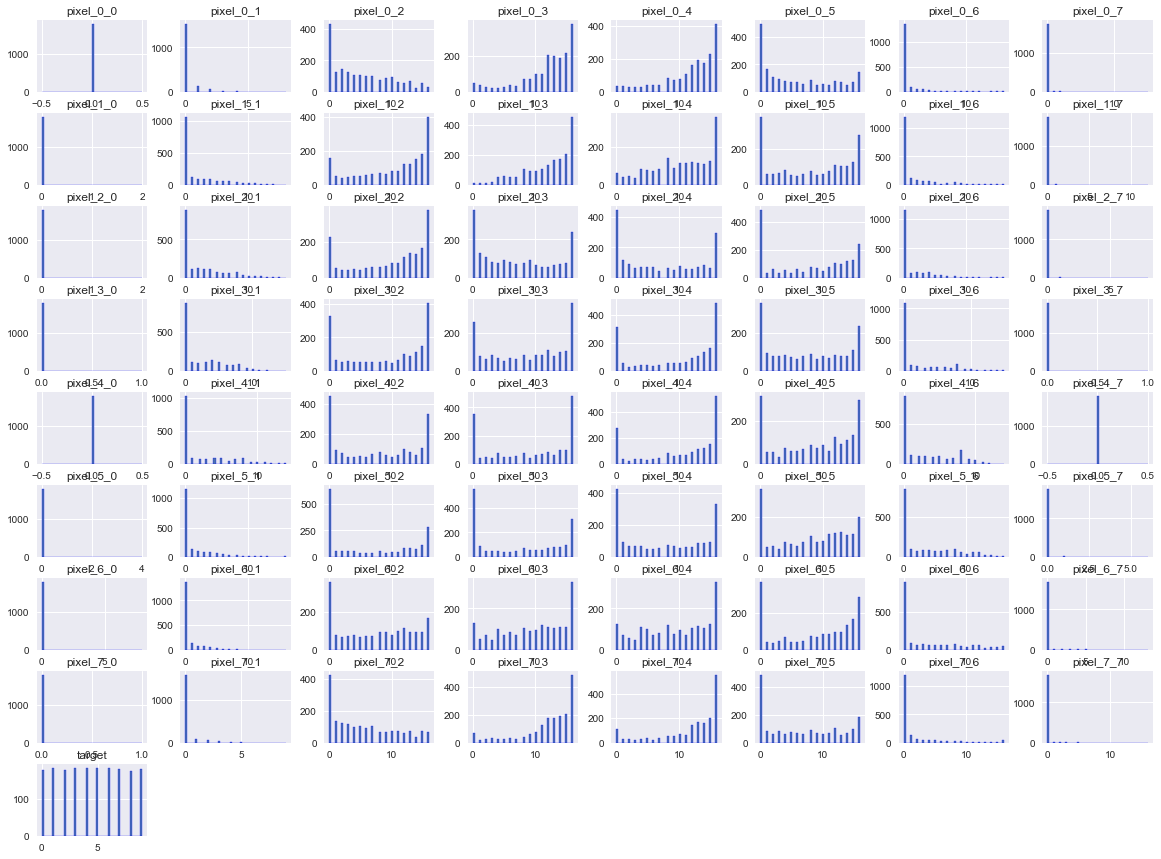

In [19]:
plt.style.use("seaborn")
df.hist(bins = 50, figsize = (20,15),ec = "b")
plt.show()

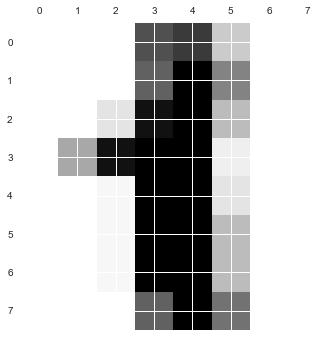

In [25]:
plt.matshow(digits.images[1])

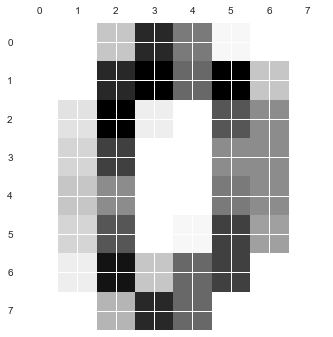

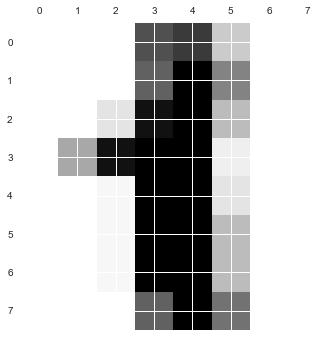

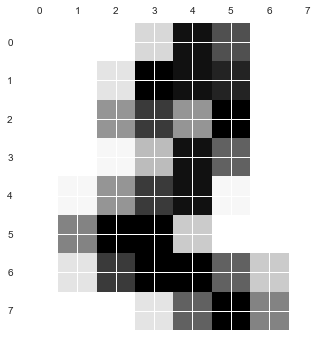

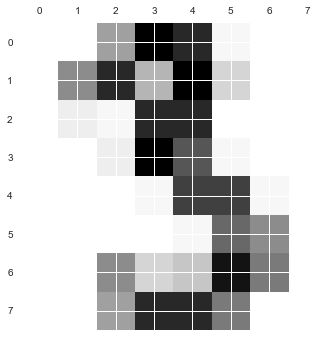

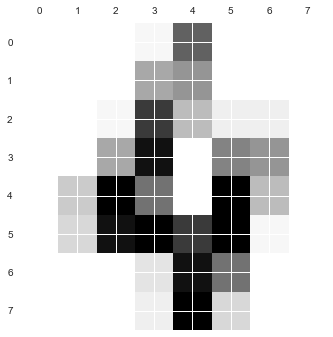

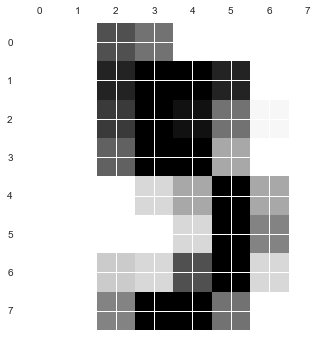

In [31]:
for i in range(0,6):
    plt.matshow(digits.images[i])

- to reduce the columns we use PCA  
- this removes columns from the images


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.33, random_state=42)

In [37]:
model = LogisticRegression(max_iter = 7600)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9730639730639731

In [65]:
"these are columns of images"
"positive column are important columns"
pca_X

array([[ -1.25946641,  21.27488413,  -9.46305171, ...,  -0.88931042,
          0.70154046,  -3.42069684],
       [  7.9576109 , -20.76869989,   4.43950697, ...,   4.47878804,
         -1.9408086 ,  -5.23896998],
       [  6.99192313,  -9.95598741,   2.95855183, ...,   1.23988085,
          0.19965047,   8.4039713 ],
       ...,
       [ 10.80128347,  -6.96025054,   5.59955437, ...,   2.47384206,
          0.86457182,   2.45363923],
       [ -4.87210015,  12.42395335, -10.17086634, ...,  -0.61345591,
          6.53688439,  -0.10847702],
       [ -0.3443893 ,   6.36554822,  10.77370439, ...,  -2.11715222,
          0.17568283,   5.178406  ]])

In [39]:
" imported PCA model"
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components = 48)

In [44]:
X = df.drop("target", axis = 1)
X.shape

(1797, 64)

In [46]:
y = digits.target
y.shape

(1797,)

In [62]:
pca = PCA(n_components = 20)
pca_X = pca.fit_transform(X)
pca_X.shape

(1797, 20)

In [63]:
X_train_pca_X, X_test_pca_X, y_train, y_test = train_test_split(pca_X, digits.target, test_size=0.33, random_state=42)

In [64]:
model = LogisticRegression(max_iter = 7600)
model.fit(X_train_pca_X, y_train)
model.score(X_test_pca_X, y_test)

0.9410774410774411